In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal, glorot_uniform
from keras.regularizers import l1, l2
from tensorflow.keras.utils import to_categorical

In [4]:
df_train = pd.read_pickle('../../Base de datos/Processed/train_clean.pkl')
df_train

,feature_2,feature_4,feature_6,feature_7,feature_13,feature_14,feature_15,feature_16,feature_17,feature_20,...,feature_197,feature_201,feature_204,feature_207,feature_208,feature_212,feature_216,feature_217,feature_218,target
0,1.0,0.000000,0.000000,0.190514,0.0,0.001558,0.866242,0.1338,3.0,0.008772,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
1,0.5,-1.000000,0.000649,0.000000,0.0,0.000000,-1.000000,0.0000,3.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
2,1.0,0.000102,0.000000,0.571429,0.0,0.000000,-1.000000,0.0000,3.0,0.000000,...,0.051724,0.054765,0.000114,0.022232,0.050545,0.000562,0.020597,0.020891,1.0,1.0
3,0.5,0.000000,0.001299,0.087886,0.0,0.000011,0.013514,0.0000,2.0,0.035088,...,0.034483,0.042598,0.012136,0.013420,0.026187,0.003375,0.020597,0.002580,0.0,1.0
4,0.0,0.000000,0.009740,0.134400,0.0,0.000069,0.113208,0.0000,3.0,0.008772,...,0.040230,0.041252,0.008640,0.004438,0.050889,0.003375,0.020597,0.002613,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472417,0.0,0.000000,0.018182,0.285714,0.0,0.000011,0.006849,0.0000,3.0,0.052632,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
472418,0.5,0.000105,0.005844,0.114286,0.0,0.000653,0.712500,0.0000,3.0,0.000000,...,0.022989,0.045631,0.007853,0.050161,0.115419,0.004499,0.020597,0.003336,1.0,1.0
472419,0.5,0.000164,0.003247,0.142857,0.0,0.000103,0.321429,0.2500,3.0,0.000000,...,0.178161,0.035461,0.006282,0.003414,0.024191,0.016873,0.020597,0.004713,0.0,1.0
472420,0.5,0.000000,0.010390,0.285714,0.0,0.000000,-1.000000,0.0000,4.0,0.000000,...,0.011494,0.058859,0.011526,0.182743,0.040467,0.000562,0.112085,0.001517,1.0,1.0


In [5]:
df_temp = pd.read_pickle('../../Base de datos/Processed/nn_challenge_test_clean.pkl')
df_temp

,feature_2,feature_4,feature_6,feature_7,feature_13,feature_14,feature_15,feature_16,feature_17,feature_20,...,feature_197,feature_201,feature_204,feature_207,feature_208,feature_212,feature_216,feature_217,feature_218,target
0,0.5,-1.000000,0.000682,0.000000,0.0,0.000000,-1.000000,0.0000,3.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
1,0.5,0.000000,0.001364,0.089721,0.0,0.000031,0.013166,0.0000,2.0,0.039216,...,0.034483,0.042598,0.012136,0.013420,0.026187,0.003963,0.020597,0.002580,0.0,1.0
2,0.5,0.000000,0.002046,0.424221,0.0,0.000000,-1.000000,0.0000,7.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
3,1.0,0.000018,0.015007,0.583363,0.0,0.000124,0.113974,0.0000,3.0,0.000000,...,0.022989,0.042971,0.001849,0.011287,0.029193,0.005945,0.199603,0.004473,0.0,1.0
4,1.0,0.000259,0.042974,0.583363,0.0,0.005125,0.877616,0.0106,3.0,0.009804,...,0.017241,0.056945,0.008079,0.000320,0.216927,0.001321,0.106760,0.005346,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270950,0.0,0.000000,0.019100,0.291681,0.0,0.000031,0.006499,0.0000,3.0,0.058824,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
270951,0.5,0.000105,0.006139,0.116673,0.0,0.001770,0.712399,0.0000,3.0,0.000000,...,0.022989,0.045631,0.007853,0.050161,0.115419,0.005284,0.020597,0.003336,1.0,1.0
270952,0.5,0.000164,0.003411,0.145841,0.0,0.000280,0.321189,0.2500,3.0,0.000000,...,0.178161,0.035461,0.006282,0.003414,0.024191,0.019815,0.020597,0.004713,0.0,1.0
270953,0.5,0.000000,0.010914,0.291681,0.0,0.000000,-1.000000,0.0000,4.0,0.000000,...,0.011494,0.058859,0.011526,0.182743,0.040467,0.000661,0.112085,0.001517,1.0,1.0


# Balanceo de datos

## Sobremuestreo

## Submuestreo

## Mantenemos igual

In [6]:
X_train = df_train.drop(columns = ['target'])
y_train = df_train['target']

In [7]:
X_temp = df_temp.drop(columns = ['target'])
y_temp = df_temp['target']

# Reescalamos datos

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [9]:
X_train

array([[ 1.40694199,  0.28807827, -0.2258945 , ..., -0.55221468,
        -0.30226032,  0.72716028],
       [-0.13580362, -3.43594233, -0.21439193, ..., -0.55221468,
        -0.30226032,  0.72716028],
       [ 1.40694199,  0.28845991, -0.2258945 , ..., -0.35352694,
         0.98889472,  0.72716028],
       ...,
       [-0.13580362,  0.28868776, -0.16838165, ..., -0.35352694,
        -0.01099016, -1.34601075],
       [-0.13580362,  0.28807827, -0.04185339, ...,  0.5290043 ,
        -0.20849423,  0.72716028],
       [-1.67854923,  0.28807827, -0.14537651, ..., -0.32616762,
        -0.06998827,  0.72716028]])

In [10]:
X_temp = scaler.fit_transform(X_temp)

In [11]:
X_temp

array([[-0.12929755, -3.46860024, -0.55628111, ..., -0.54423812,
        -0.27941414,  0.72411526],
       [-0.12929755,  0.28567894, -0.53062369, ..., -0.34715036,
        -0.14337864, -1.38099562],
       [-0.12929755,  0.28567894, -0.50496626, ..., -0.54423812,
        -0.27941414,  0.72411526],
       ...,
       [-0.12929755,  0.28629338, -0.45365141, ..., -0.34715036,
        -0.0309148 , -1.38099562],
       [-0.12929755,  0.28567894, -0.17141977, ...,  0.52827406,
        -0.1994169 ,  0.72411526],
       [-1.65609172,  0.28567894, -0.40233657, ..., -0.32001137,
        -0.08124948,  0.72411526]])

In [12]:
from sklearn.model_selection import train_test_split

# Luego, dividimos el conjunto temporal en conjuntos de validación y prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((472422, 137), (135477, 137), (135478, 137), (472422,), (135477,), (135478,))

In [13]:
np.shape(X_val)

(135477, 137)

In [14]:
y_val

10885     1.0
122065    1.0
104221    1.0
222013    1.0
192297    1.0
         ... 
119879    1.0
259178    1.0
131932    0.0
146867    0.0
121958    1.0
Name: target, Length: 135477, dtype: float64

# Unimos coeficeintes con datos

In [15]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [16]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(137,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

# Mezclar y procesar por lotes los conjuntos de datos

In [17]:
BATCH_SIZE = 1000
SHUFFLE_BUFFER_SIZE = 1000

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Creación del modelo

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout
from keras.regularizers import l1

model = Sequential()

# Flatten layer
model.add(Flatten(input_shape=(137,)))

# Batch normalization
model.add(BatchNormalization())

# First set of dense layers
model.add(Dense(137, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dense(137, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dense(137, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dense(137, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


# Second set of dense layers
model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Dense(100, activation='relu', kernel_initializer='glorot_uniform'))

model.add(Dense(50, activation='relu', kernel_initializer='glorot_uniform'))


# Dropout layer
model.add(Dropout(0.2))

# Another batch normalization

# Output layer
model.add(Dense(1, activation='sigmoid'))




In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 137)               0         
                                                                 
 batch_normalization (BatchN  (None, 137)              548       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 137)               18906     
                                                                 
 batch_normalization_1 (Batc  (None, 137)              548       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 137)               18906     
                                                                 
 batch_normalization_2 (Batc  (None, 137)              5

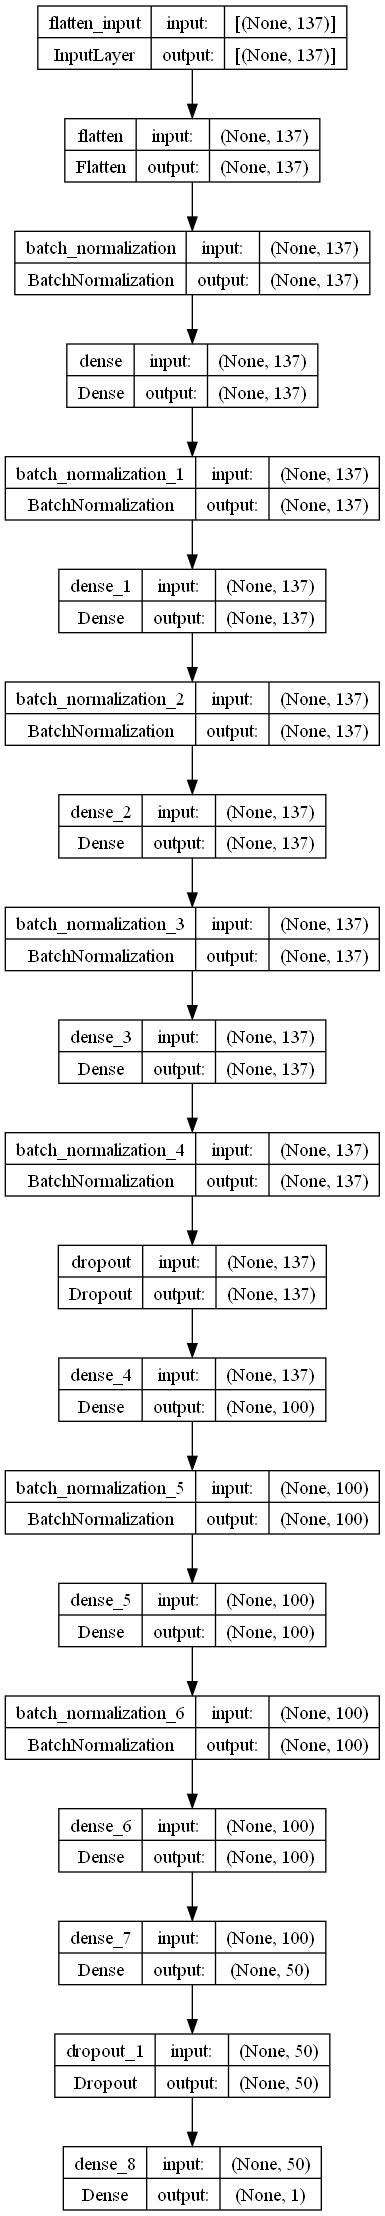

In [20]:
keras.utils.plot_model(model,show_shapes=True)

# Entrenamos el modelo

In [21]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001,clipvalue=100.0)

In [22]:
def total_mae_loss(y_true, y_pred):
    total_loss = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    tf.print(y_true, summarize = -1)
    tf.print(y_pred, summarize = -1)
    return total_loss

In [23]:
def brier_score(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [24]:
model.compile(optimizer= 'Adam',
              loss= 'binary_crossentropy',
              metrics=[brier_score, 'accuracy'])

In [25]:
def scheduler(epoch, lr):
    if epoch < 200:
        return 0.001
    elif epoch >= 200 and epoch <= 1000:
        slope = (0.000001 - 0.001) / (1000 - 200)
        intercept = 0.001 - (slope * 200)
        return slope * epoch + intercept
    else:
        return 0.000001  # Mantener el learning rate en 0.000001 para épocas mayores a 1000 si es necesario

In [26]:
from keras.callbacks import Callback
import keras.backend as K

class CyclicLR(Callback):
    def __init__(self, base_lr=0.0001, max_lr=0.006, step_size=2000., mode='triangular'):
        super(CyclicLR, self).__init__()
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.clr_iterations = 0.
        self.trn_iterations = 0.
        self.history = {}

    def clr(self):
        cycle = np.floor(1 + self.clr_iterations / (2 * self.step_size))
        x = np.abs(self.clr_iterations / self.step_size - 2 * cycle + 1)
        if self.mode == 'triangular':
            return self.base_lr + (self.max_lr - self.base_lr) * np.maximum(0, (1 - x))

    def on_train_begin(self, logs={}):
        logs = logs or {}
        if self.clr_iterations == 0:
            K.set_value(self.model.optimizer.lr, self.base_lr)
        else:
            K.set_value(self.model.optimizer.lr, self.clr())

    def on_batch_end(self, epoch, logs=None):
        logs = logs or {}
        self.trn_iterations += 1
        self.clr_iterations += 1
        K.set_value(self.model.optimizer.lr, self.clr())
        
#    def on_epoch_end(self, epoch, logs=None):
#        # Imprimir el learning rate actual
#        current_lr = K.get_value(self.model.optimizer.lr)
#        print(f"Current Learning Rate at end of epoch {epoch}: {current_lr}")    

In [27]:
class PrintLastBatch(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        for batch, (x, y) in enumerate(val_dataset):  # Cambia 'val_dataset' por 'train_dataset' si deseas usar datos de entrenamiento
            pass  # Este bucle se ejecutará hasta el último batch
        
        y_pred = self.model.predict(x)
        
        tf.print("Último y_true de la época:", y, summarize=-1)
        tf.print("Último y_pred de la época:", y_pred, summarize=-1)

In [ ]:
val_epochs = 10000

early_stop = tf.keras.callbacks.EarlyStopping( monitor = 'val_accuracy', patience = 2000,verbose = 1, 
                                              restore_best_weights = True)

class_weights = {0: 1, 1: .16}  # asigna más peso a la clase 0

clr = CyclicLR(base_lr=0.0001, max_lr=0.006, step_size=2000., mode='triangular')

reduce_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)
history = model.fit(train_dataset, validation_data=val_dataset, epochs= val_epochs, callbacks=[clr, early_stop],
                    class_weight=class_weights)
#history = model.fit(train_dataset, validation_data=val_dataset, epochs= val_epochs, callbacks=[reduce_lr, early_stop, PrintLastBatch()],
#                   class_weight=class_weights)

Epoch 1/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1958 - brier_score: 0.2658 - accuracy: 0.4849 - val_loss: 0.5813 - val_brier_score: 0.1976 - val_accuracy: 0.7740
Epoch 2/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1879 - brier_score: 0.2433 - accuracy: 0.5522 - val_loss: 0.5553 - val_brier_score: 0.1862 - val_accuracy: 0.6189
Epoch 3/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1868 - brier_score: 0.2445 - accuracy: 0.5055 - val_loss: 0.5458 - val_brier_score: 0.1712 - val_accuracy: 0.8034
Epoch 4/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1865 - brier_score: 0.2447 - accuracy: 0.5499 - val_loss: 0.5893 - val_brier_score: 0.1708 - val_accuracy: 0.8520
Epoch 5/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1865 - brier_score: 0.2427 - accuracy: 0.5799 - val_loss: 0.5951 - val_brier_score: 0.1750 - val_accuracy: 0.8520
Epoch 6/10000
473/473 [=======

473/473 [==============================] - 5s 10ms/step - loss: 0.1644 - brier_score: 0.2305 - accuracy: 0.5192 - val_loss: 0.7735 - val_brier_score: 0.2908 - val_accuracy: 0.3442
Epoch 44/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1628 - brier_score: 0.2269 - accuracy: 0.5307 - val_loss: 0.6768 - val_brier_score: 0.2448 - val_accuracy: 0.5036
Epoch 45/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1639 - brier_score: 0.2274 - accuracy: 0.5321 - val_loss: 0.6439 - val_brier_score: 0.2280 - val_accuracy: 0.5600
Epoch 46/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1660 - brier_score: 0.2284 - accuracy: 0.5285 - val_loss: 0.5902 - val_brier_score: 0.2026 - val_accuracy: 0.6669
Epoch 47/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1681 - brier_score: 0.2300 - accuracy: 0.5218 - val_loss: 0.6066 - val_brier_score: 0.2046 - val_accuracy: 0.6564
Epoch 48/10000
473/473 [================

473/473 [==============================] - 5s 10ms/step - loss: 0.1482 - brier_score: 0.2035 - accuracy: 0.6137 - val_loss: 0.7746 - val_brier_score: 0.2896 - val_accuracy: 0.4109
Epoch 86/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1466 - brier_score: 0.2109 - accuracy: 0.6003 - val_loss: 0.7812 - val_brier_score: 0.2877 - val_accuracy: 0.4067
Epoch 87/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1481 - brier_score: 0.2117 - accuracy: 0.5990 - val_loss: 0.7103 - val_brier_score: 0.2459 - val_accuracy: 0.4953
Epoch 88/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1511 - brier_score: 0.2141 - accuracy: 0.5937 - val_loss: 0.7235 - val_brier_score: 0.2403 - val_accuracy: 0.5111
Epoch 89/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1549 - brier_score: 0.2167 - accuracy: 0.5825 - val_loss: 0.6827 - val_brier_score: 0.1993 - val_accuracy: 0.6413
Epoch 90/10000
473/473 [================

Epoch 127/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1378 - brier_score: 0.1885 - accuracy: 0.6619 - val_loss: 0.9018 - val_brier_score: 0.2753 - val_accuracy: 0.4880
Epoch 128/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1345 - brier_score: 0.1982 - accuracy: 0.6462 - val_loss: 0.9194 - val_brier_score: 0.2742 - val_accuracy: 0.4684
Epoch 129/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1349 - brier_score: 0.1947 - accuracy: 0.6519 - val_loss: 0.7452 - val_brier_score: 0.1415 - val_accuracy: 0.8520
Epoch 130/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1421 - brier_score: 0.2029 - accuracy: 0.6392 - val_loss: 0.7608 - val_brier_score: 0.2444 - val_accuracy: 0.5312
Epoch 131/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1423 - brier_score: 0.2025 - accuracy: 0.6332 - val_loss: 0.7483 - val_brier_score: 0.2235 - val_accuracy: 0.5783
Epoch 132/10000
473/

Epoch 169/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1283 - brier_score: 0.1822 - accuracy: 0.6883 - val_loss: 0.9627 - val_brier_score: 0.2892 - val_accuracy: 0.4907
Epoch 170/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1291 - brier_score: 0.1953 - accuracy: 0.6647 - val_loss: 0.9624 - val_brier_score: 0.2914 - val_accuracy: 0.4915
Epoch 171/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1272 - brier_score: 0.1868 - accuracy: 0.6836 - val_loss: 0.9444 - val_brier_score: 0.2702 - val_accuracy: 0.5252
Epoch 172/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1297 - brier_score: 0.1882 - accuracy: 0.6802 - val_loss: 0.7685 - val_brier_score: 0.2177 - val_accuracy: 0.5824
Epoch 173/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1348 - brier_score: 0.1933 - accuracy: 0.6639 - val_loss: 0.8748 - val_brier_score: 0.1381 - val_accuracy: 0.8519
Epoch 174/10000
473/

Epoch 211/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1261 - brier_score: 0.1795 - accuracy: 0.6995 - val_loss: 1.0270 - val_brier_score: 0.2957 - val_accuracy: 0.4869
Epoch 212/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1244 - brier_score: 0.1787 - accuracy: 0.6999 - val_loss: 1.0128 - val_brier_score: 0.2988 - val_accuracy: 0.4845
Epoch 213/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1234 - brier_score: 0.1813 - accuracy: 0.6968 - val_loss: 1.3172 - val_brier_score: 0.2817 - val_accuracy: 0.5181
Epoch 214/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1254 - brier_score: 0.1828 - accuracy: 0.6964 - val_loss: 1.2333 - val_brier_score: 0.2278 - val_accuracy: 0.5921
Epoch 215/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1289 - brier_score: 0.1855 - accuracy: 0.6875 - val_loss: 1.0043 - val_brier_score: 0.2294 - val_accuracy: 0.6042
Epoch 216/10000
473/

Epoch 253/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1231 - brier_score: 0.1757 - accuracy: 0.7090 - val_loss: 0.8457 - val_brier_score: 0.2877 - val_accuracy: 0.5162
Epoch 254/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1209 - brier_score: 0.1680 - accuracy: 0.7239 - val_loss: 0.8299 - val_brier_score: 0.2881 - val_accuracy: 0.5170
Epoch 255/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1193 - brier_score: 0.1760 - accuracy: 0.7116 - val_loss: 0.8422 - val_brier_score: 0.2745 - val_accuracy: 0.5453
Epoch 256/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1197 - brier_score: 0.1754 - accuracy: 0.7126 - val_loss: 0.8149 - val_brier_score: 0.2552 - val_accuracy: 0.5743
Epoch 257/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1240 - brier_score: 0.1792 - accuracy: 0.7047 - val_loss: 0.9385 - val_brier_score: 0.2266 - val_accuracy: 0.6026
Epoch 258/10000
473/

Epoch 295/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1210 - brier_score: 0.1731 - accuracy: 0.7188 - val_loss: 0.8004 - val_brier_score: 0.2725 - val_accuracy: 0.5533
Epoch 296/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1185 - brier_score: 0.1651 - accuracy: 0.7332 - val_loss: 0.7921 - val_brier_score: 0.2639 - val_accuracy: 0.5722
Epoch 297/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1174 - brier_score: 0.1746 - accuracy: 0.7195 - val_loss: 0.8179 - val_brier_score: 0.2780 - val_accuracy: 0.5500
Epoch 298/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1167 - brier_score: 0.1706 - accuracy: 0.7255 - val_loss: 0.8521 - val_brier_score: 0.2486 - val_accuracy: 0.6067
Epoch 299/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1198 - brier_score: 0.1747 - accuracy: 0.7161 - val_loss: 0.7773 - val_brier_score: 0.2420 - val_accuracy: 0.5940
Epoch 300/10000
473/

Epoch 337/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1199 - brier_score: 0.1715 - accuracy: 0.7207 - val_loss: 0.8067 - val_brier_score: 0.2742 - val_accuracy: 0.5601
Epoch 338/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1165 - brier_score: 0.1660 - accuracy: 0.7324 - val_loss: 0.8092 - val_brier_score: 0.2892 - val_accuracy: 0.5332
Epoch 339/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1159 - brier_score: 0.1716 - accuracy: 0.7235 - val_loss: 0.8212 - val_brier_score: 0.2882 - val_accuracy: 0.5387
Epoch 340/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1147 - brier_score: 0.1680 - accuracy: 0.7312 - val_loss: 0.8378 - val_brier_score: 0.2761 - val_accuracy: 0.5562
Epoch 341/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1169 - brier_score: 0.1695 - accuracy: 0.7275 - val_loss: 0.8665 - val_brier_score: 0.2497 - val_accuracy: 0.5998
Epoch 342/10000
473/

Epoch 379/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1199 - brier_score: 0.1707 - accuracy: 0.7264 - val_loss: 0.8207 - val_brier_score: 0.2699 - val_accuracy: 0.5619
Epoch 380/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1167 - brier_score: 0.1656 - accuracy: 0.7366 - val_loss: 0.8347 - val_brier_score: 0.2853 - val_accuracy: 0.5413
Epoch 381/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1150 - brier_score: 0.1611 - accuracy: 0.7422 - val_loss: 0.8340 - val_brier_score: 0.2887 - val_accuracy: 0.5333
Epoch 382/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1134 - brier_score: 0.1663 - accuracy: 0.7362 - val_loss: 0.8468 - val_brier_score: 0.2709 - val_accuracy: 0.5688
Epoch 383/10000
473/473 [==============================] - 5s 10ms/step - loss: 0.1143 - brier_score: 0.1658 - accuracy: 0.7389 - val_loss: 0.8844 - val_brier_score: 0.2462 - val_accuracy: 0.6111
Epoch 384/10000
473/

Epoch 421/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1199 - brier_score: 0.1703 - accuracy: 0.7269 - val_loss: 0.8803 - val_brier_score: 0.2606 - val_accuracy: 0.5844
Epoch 422/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1159 - brier_score: 0.1652 - accuracy: 0.7371 - val_loss: 0.9027 - val_brier_score: 0.2812 - val_accuracy: 0.5506
Epoch 423/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1145 - brier_score: 0.1577 - accuracy: 0.7497 - val_loss: 0.8697 - val_brier_score: 0.2631 - val_accuracy: 0.5819
Epoch 424/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1127 - brier_score: 0.1652 - accuracy: 0.7401 - val_loss: 0.9322 - val_brier_score: 0.2826 - val_accuracy: 0.5557
Epoch 425/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1131 - brier_score: 0.1641 - accuracy: 0.7411 - val_loss: 1.0313 - val_brier_score: 0.2620 - val_accuracy: 0.5874
Epoch 426/10000
473/

Epoch 463/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1173 - brier_score: 0.1665 - accuracy: 0.7357 - val_loss: 1.1011 - val_brier_score: 0.2520 - val_accuracy: 0.6040
Epoch 464/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1135 - brier_score: 0.1621 - accuracy: 0.7425 - val_loss: 1.0598 - val_brier_score: 0.2740 - val_accuracy: 0.5741
Epoch 465/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1112 - brier_score: 0.1564 - accuracy: 0.7539 - val_loss: 1.0370 - val_brier_score: 0.2749 - val_accuracy: 0.5712
Epoch 466/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1115 - brier_score: 0.1687 - accuracy: 0.7341 - val_loss: 1.0479 - val_brier_score: 0.2862 - val_accuracy: 0.5563
Epoch 467/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1094 - brier_score: 0.1590 - accuracy: 0.7515 - val_loss: 1.1067 - val_brier_score: 0.1925 - val_accuracy: 0.7345
Epoch 468/10000
473/

Epoch 505/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1162 - brier_score: 0.1652 - accuracy: 0.7390 - val_loss: 1.3261 - val_brier_score: 0.2505 - val_accuracy: 0.6076
Epoch 506/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1126 - brier_score: 0.1605 - accuracy: 0.7488 - val_loss: 0.9994 - val_brier_score: 0.2756 - val_accuracy: 0.5716
Epoch 507/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1100 - brier_score: 0.1561 - accuracy: 0.7563 - val_loss: 1.1860 - val_brier_score: 0.2839 - val_accuracy: 0.5599
Epoch 508/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1090 - brier_score: 0.1565 - accuracy: 0.7553 - val_loss: 1.1508 - val_brier_score: 0.2856 - val_accuracy: 0.5572
Epoch 509/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1078 - brier_score: 0.1584 - accuracy: 0.7533 - val_loss: 1.4078 - val_brier_score: 0.2667 - val_accuracy: 0.5905
Epoch 510/10000
473/

Epoch 547/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1151 - brier_score: 0.1638 - accuracy: 0.7405 - val_loss: 1.4897 - val_brier_score: 0.2461 - val_accuracy: 0.6167
Epoch 548/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1123 - brier_score: 0.1594 - accuracy: 0.7507 - val_loss: 1.2363 - val_brier_score: 0.2678 - val_accuracy: 0.5888
Epoch 549/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1093 - brier_score: 0.1555 - accuracy: 0.7585 - val_loss: 1.2399 - val_brier_score: 0.2863 - val_accuracy: 0.5590
Epoch 550/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1082 - brier_score: 0.1499 - accuracy: 0.7674 - val_loss: 1.1259 - val_brier_score: 0.2846 - val_accuracy: 0.5606
Epoch 551/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1066 - brier_score: 0.1559 - accuracy: 0.7593 - val_loss: 1.2620 - val_brier_score: 0.2800 - val_accuracy: 0.5737
Epoch 552/10000
473/

Epoch 589/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1171 - brier_score: 0.1656 - accuracy: 0.7368 - val_loss: 1.2456 - val_brier_score: 0.2361 - val_accuracy: 0.6364
Epoch 590/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1141 - brier_score: 0.1622 - accuracy: 0.7438 - val_loss: 1.0941 - val_brier_score: 0.2530 - val_accuracy: 0.6113
Epoch 591/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1112 - brier_score: 0.1581 - accuracy: 0.7518 - val_loss: 1.0529 - val_brier_score: 0.2699 - val_accuracy: 0.5866
Epoch 592/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1091 - brier_score: 0.1511 - accuracy: 0.7636 - val_loss: 1.0167 - val_brier_score: 0.2537 - val_accuracy: 0.6152
Epoch 593/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1085 - brier_score: 0.1605 - accuracy: 0.7511 - val_loss: 1.1516 - val_brier_score: 0.2713 - val_accuracy: 0.5856
Epoch 594/10000
473/

Epoch 631/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1158 - brier_score: 0.1644 - accuracy: 0.7407 - val_loss: 2.6602 - val_brier_score: 0.2369 - val_accuracy: 0.6397
Epoch 632/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1146 - brier_score: 0.1620 - accuracy: 0.7453 - val_loss: 2.1136 - val_brier_score: 0.2513 - val_accuracy: 0.6170
Epoch 633/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1111 - brier_score: 0.1580 - accuracy: 0.7541 - val_loss: 2.6952 - val_brier_score: 0.2130 - val_accuracy: 0.7060
Epoch 634/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1094 - brier_score: 0.1556 - accuracy: 0.7611 - val_loss: 2.1448 - val_brier_score: 0.2828 - val_accuracy: 0.5611
Epoch 635/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1093 - brier_score: 0.1636 - accuracy: 0.7452 - val_loss: 2.0348 - val_brier_score: 0.2765 - val_accuracy: 0.5735
Epoch 636/10000
473/

Epoch 673/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1151 - brier_score: 0.1629 - accuracy: 0.7452 - val_loss: 2.6197 - val_brier_score: 0.2194 - val_accuracy: 0.6657
Epoch 674/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1130 - brier_score: 0.1602 - accuracy: 0.7497 - val_loss: 4.5967 - val_brier_score: 0.2438 - val_accuracy: 0.6326
Epoch 675/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1101 - brier_score: 0.1564 - accuracy: 0.7576 - val_loss: 3.0836 - val_brier_score: 0.2606 - val_accuracy: 0.6060
Epoch 676/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1079 - brier_score: 0.1525 - accuracy: 0.7654 - val_loss: 3.4968 - val_brier_score: 0.2755 - val_accuracy: 0.5787
Epoch 677/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1063 - brier_score: 0.1479 - accuracy: 0.7730 - val_loss: 5.7896 - val_brier_score: 0.2833 - val_accuracy: 0.5662
Epoch 678/10000
473/

Epoch 715/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1136 - brier_score: 0.1617 - accuracy: 0.7467 - val_loss: 3.1911 - val_brier_score: 0.2226 - val_accuracy: 0.6598
Epoch 716/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1147 - brier_score: 0.1622 - accuracy: 0.7467 - val_loss: 6.0505 - val_brier_score: 0.2470 - val_accuracy: 0.6029
Epoch 717/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1125 - brier_score: 0.1590 - accuracy: 0.7509 - val_loss: 3.0739 - val_brier_score: 0.2529 - val_accuracy: 0.6124
Epoch 718/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1084 - brier_score: 0.1538 - accuracy: 0.7623 - val_loss: 3.7802 - val_brier_score: 0.2756 - val_accuracy: 0.5807
Epoch 719/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1077 - brier_score: 0.1479 - accuracy: 0.7713 - val_loss: 4.7033 - val_brier_score: 0.2684 - val_accuracy: 0.5892
Epoch 720/10000
473/

Epoch 757/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1124 - brier_score: 0.1597 - accuracy: 0.7526 - val_loss: 1.4487 - val_brier_score: 0.2140 - val_accuracy: 0.6795
Epoch 758/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1128 - brier_score: 0.1594 - accuracy: 0.7513 - val_loss: 2.2637 - val_brier_score: 0.2315 - val_accuracy: 0.6514
Epoch 759/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1104 - brier_score: 0.1562 - accuracy: 0.7580 - val_loss: 1.4420 - val_brier_score: 0.2495 - val_accuracy: 0.6231
Epoch 760/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1086 - brier_score: 0.1541 - accuracy: 0.7620 - val_loss: 1.2598 - val_brier_score: 0.2703 - val_accuracy: 0.5910
Epoch 761/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1060 - brier_score: 0.1482 - accuracy: 0.7725 - val_loss: 1.1340 - val_brier_score: 0.2725 - val_accuracy: 0.5861
Epoch 762/10000
473/

Epoch 799/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1088 - brier_score: 0.1552 - accuracy: 0.7613 - val_loss: 1.4858 - val_brier_score: 0.2315 - val_accuracy: 0.6532
Epoch 800/10000
473/473 [==============================] - 5s 11ms/step - loss: 0.1115 - brier_score: 0.1576 - accuracy: 0.7545 - val_loss: 1.0567 - val_brier_score: 0.1457 - val_accuracy: 0.8278
Epoch 801/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1136 - brier_score: 0.1593 - accuracy: 0.7553 - val_loss: 1.4983 - val_brier_score: 0.1968 - val_accuracy: 0.7460
Epoch 802/10000
473/473 [==============================] - 5s 12ms/step - loss: 0.1102 - brier_score: 0.1549 - accuracy: 0.7619 - val_loss: 0.9958 - val_brier_score: 0.2602 - val_accuracy: 0.6060
Epoch 803/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1061 - brier_score: 0.1490 - accuracy: 0.7708 - val_loss: 1.0288 - val_brier_score: 0.2785 - val_accuracy: 0.5747
Epoch 804/10000
473/

Epoch 841/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1077 - brier_score: 0.1530 - accuracy: 0.7658 - val_loss: 2.2362 - val_brier_score: 0.2116 - val_accuracy: 0.7125
Epoch 842/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1115 - brier_score: 0.1580 - accuracy: 0.7555 - val_loss: 1.5173 - val_brier_score: 0.2209 - val_accuracy: 0.6813
Epoch 843/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1095 - brier_score: 0.1555 - accuracy: 0.7585 - val_loss: 1.6978 - val_brier_score: 0.2436 - val_accuracy: 0.6321
Epoch 844/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1076 - brier_score: 0.1526 - accuracy: 0.7659 - val_loss: 2.2971 - val_brier_score: 0.2548 - val_accuracy: 0.6187
Epoch 845/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1048 - brier_score: 0.1484 - accuracy: 0.7736 - val_loss: 1.7149 - val_brier_score: 0.2742 - val_accuracy: 0.5846
Epoch 846/10000
473/

Epoch 883/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1063 - brier_score: 0.1521 - accuracy: 0.7673 - val_loss: 1.8642 - val_brier_score: 0.2358 - val_accuracy: 0.6503
Epoch 884/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1115 - brier_score: 0.1581 - accuracy: 0.7537 - val_loss: 1.2065 - val_brier_score: 0.2295 - val_accuracy: 0.6567
Epoch 885/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1135 - brier_score: 0.1602 - accuracy: 0.7474 - val_loss: 1.0348 - val_brier_score: 0.2261 - val_accuracy: 0.6591
Epoch 886/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1108 - brier_score: 0.1563 - accuracy: 0.7561 - val_loss: 2.3240 - val_brier_score: 0.2487 - val_accuracy: 0.6235
Epoch 887/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1072 - brier_score: 0.1506 - accuracy: 0.7665 - val_loss: 2.5360 - val_brier_score: 0.2561 - val_accuracy: 0.6162
Epoch 888/10000
473/

Epoch 925/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1035 - brier_score: 0.1480 - accuracy: 0.7772 - val_loss: 1.9682 - val_brier_score: 0.2315 - val_accuracy: 0.6632
Epoch 926/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1080 - brier_score: 0.1535 - accuracy: 0.7661 - val_loss: 2.8911 - val_brier_score: 0.2168 - val_accuracy: 0.6851
Epoch 927/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1115 - brier_score: 0.1573 - accuracy: 0.7569 - val_loss: 7.3706 - val_brier_score: 0.2237 - val_accuracy: 0.6696
Epoch 928/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1083 - brier_score: 0.1530 - accuracy: 0.7652 - val_loss: 2.7522 - val_brier_score: 0.2394 - val_accuracy: 0.6470
Epoch 929/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1051 - brier_score: 0.1490 - accuracy: 0.7727 - val_loss: 2.2990 - val_brier_score: 0.2586 - val_accuracy: 0.6159
Epoch 930/10000
473/

Epoch 967/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1034 - brier_score: 0.1477 - accuracy: 0.7764 - val_loss: 1.4426 - val_brier_score: 0.1951 - val_accuracy: 0.7557
Epoch 968/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1084 - brier_score: 0.1542 - accuracy: 0.7643 - val_loss: 1.1188 - val_brier_score: 0.2191 - val_accuracy: 0.6759
Epoch 969/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1110 - brier_score: 0.1559 - accuracy: 0.7590 - val_loss: 1.0425 - val_brier_score: 0.2326 - val_accuracy: 0.6544
Epoch 970/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1082 - brier_score: 0.1528 - accuracy: 0.7656 - val_loss: 0.9577 - val_brier_score: 0.2440 - val_accuracy: 0.6384
Epoch 971/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1056 - brier_score: 0.1497 - accuracy: 0.7719 - val_loss: 0.8670 - val_brier_score: 0.2584 - val_accuracy: 0.6141
Epoch 972/10000
473/

Epoch 1009/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1022 - brier_score: 0.1465 - accuracy: 0.7796 - val_loss: 1.1256 - val_brier_score: 0.2500 - val_accuracy: 0.6359
Epoch 1010/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1052 - brier_score: 0.1493 - accuracy: 0.7733 - val_loss: 1.1679 - val_brier_score: 0.2187 - val_accuracy: 0.6817
Epoch 1011/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1083 - brier_score: 0.1536 - accuracy: 0.7654 - val_loss: 1.0627 - val_brier_score: 0.2208 - val_accuracy: 0.6773
Epoch 1012/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1075 - brier_score: 0.1517 - accuracy: 0.7681 - val_loss: 1.1041 - val_brier_score: 0.2379 - val_accuracy: 0.6511
Epoch 1013/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1050 - brier_score: 0.1484 - accuracy: 0.7748 - val_loss: 1.0391 - val_brier_score: 0.2497 - val_accuracy: 0.6322
Epoch 1014/1000

473/473 [==============================] - 6s 12ms/step - loss: 0.1017 - brier_score: 0.1470 - accuracy: 0.7776 - val_loss: 1.0002 - val_brier_score: 0.2575 - val_accuracy: 0.6225
Epoch 1051/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1016 - brier_score: 0.1459 - accuracy: 0.7805 - val_loss: 1.2211 - val_brier_score: 0.2507 - val_accuracy: 0.6317
Epoch 1052/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1043 - brier_score: 0.1488 - accuracy: 0.7748 - val_loss: 1.0943 - val_brier_score: 0.2244 - val_accuracy: 0.6823
Epoch 1053/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1094 - brier_score: 0.1553 - accuracy: 0.7608 - val_loss: 1.1197 - val_brier_score: 0.1962 - val_accuracy: 0.7174
Epoch 1054/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1121 - brier_score: 0.1577 - accuracy: 0.7563 - val_loss: 1.3365 - val_brier_score: 0.2371 - val_accuracy: 0.6488
Epoch 1055/10000
473/473 [======

Epoch 1092/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1002 - brier_score: 0.1463 - accuracy: 0.7806 - val_loss: 1.0188 - val_brier_score: 0.2642 - val_accuracy: 0.6125
Epoch 1093/10000
473/473 [==============================] - 5s 12ms/step - loss: 0.1006 - brier_score: 0.1444 - accuracy: 0.7835 - val_loss: 0.9855 - val_brier_score: 0.2462 - val_accuracy: 0.6416
Epoch 1094/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1022 - brier_score: 0.1462 - accuracy: 0.7796 - val_loss: 1.1008 - val_brier_score: 0.2369 - val_accuracy: 0.6494
Epoch 1095/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1065 - brier_score: 0.1514 - accuracy: 0.7692 - val_loss: 1.7634 - val_brier_score: 0.2230 - val_accuracy: 0.6770
Epoch 1096/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1108 - brier_score: 0.1557 - accuracy: 0.7589 - val_loss: 5.7369 - val_brier_score: 0.1608 - val_accuracy: 0.8198
Epoch 1097/1000

473/473 [==============================] - 6s 12ms/step - loss: 0.1021 - brier_score: 0.1421 - accuracy: 0.7849 - val_loss: 0.9051 - val_brier_score: 0.2637 - val_accuracy: 0.6054
Epoch 1134/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1028 - brier_score: 0.1517 - accuracy: 0.7699 - val_loss: 0.9251 - val_brier_score: 0.2617 - val_accuracy: 0.6127
Epoch 1135/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1005 - brier_score: 0.1444 - accuracy: 0.7828 - val_loss: 0.9440 - val_brier_score: 0.2496 - val_accuracy: 0.6366
Epoch 1136/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1016 - brier_score: 0.1451 - accuracy: 0.7830 - val_loss: 0.9486 - val_brier_score: 0.2326 - val_accuracy: 0.6581
Epoch 1137/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1045 - brier_score: 0.1476 - accuracy: 0.7774 - val_loss: 1.3655 - val_brier_score: 0.2302 - val_accuracy: 0.6672
Epoch 1138/10000
473/473 [======

Epoch 1175/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0999 - brier_score: 0.1407 - accuracy: 0.7898 - val_loss: 1.1578 - val_brier_score: 0.2723 - val_accuracy: 0.5976
Epoch 1176/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0992 - brier_score: 0.1379 - accuracy: 0.7929 - val_loss: 1.0636 - val_brier_score: 0.2667 - val_accuracy: 0.6060
Epoch 1177/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0980 - brier_score: 0.1413 - accuracy: 0.7889 - val_loss: 1.3868 - val_brier_score: 0.2645 - val_accuracy: 0.6184
Epoch 1178/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0983 - brier_score: 0.1410 - accuracy: 0.7907 - val_loss: 1.5304 - val_brier_score: 0.2433 - val_accuracy: 0.6527
Epoch 1179/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1014 - brier_score: 0.1444 - accuracy: 0.7843 - val_loss: 2.1192 - val_brier_score: 0.2338 - val_accuracy: 0.6613
Epoch 1180/1000

473/473 [==============================] - 6s 12ms/step - loss: 0.1019 - brier_score: 0.1440 - accuracy: 0.7832 - val_loss: 1.7241 - val_brier_score: 0.2546 - val_accuracy: 0.6310
Epoch 1217/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0991 - brier_score: 0.1398 - accuracy: 0.7905 - val_loss: 2.3910 - val_brier_score: 0.2642 - val_accuracy: 0.6140
Epoch 1218/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0988 - brier_score: 0.1349 - accuracy: 0.7983 - val_loss: 1.6837 - val_brier_score: 0.2627 - val_accuracy: 0.6142
Epoch 1219/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0975 - brier_score: 0.1413 - accuracy: 0.7902 - val_loss: 1.4039 - val_brier_score: 0.2673 - val_accuracy: 0.6135
Epoch 1220/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0971 - brier_score: 0.1396 - accuracy: 0.7932 - val_loss: 2.3430 - val_brier_score: 0.2547 - val_accuracy: 0.6333
Epoch 1221/10000
473/473 [======

Epoch 1258/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1053 - brier_score: 0.1485 - accuracy: 0.7741 - val_loss: 1.0755 - val_brier_score: 0.2471 - val_accuracy: 0.6387
Epoch 1259/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1015 - brier_score: 0.1433 - accuracy: 0.7841 - val_loss: 1.1196 - val_brier_score: 0.2621 - val_accuracy: 0.6161
Epoch 1260/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1001 - brier_score: 0.1381 - accuracy: 0.7938 - val_loss: 1.0742 - val_brier_score: 0.2567 - val_accuracy: 0.6234
Epoch 1261/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1008 - brier_score: 0.1492 - accuracy: 0.7778 - val_loss: 1.0389 - val_brier_score: 0.2617 - val_accuracy: 0.6169
Epoch 1262/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0988 - brier_score: 0.1418 - accuracy: 0.7897 - val_loss: 1.1321 - val_brier_score: 0.2434 - val_accuracy: 0.6523
Epoch 1263/1000

473/473 [==============================] - 6s 12ms/step - loss: 0.1055 - brier_score: 0.1484 - accuracy: 0.7759 - val_loss: 0.9512 - val_brier_score: 0.2319 - val_accuracy: 0.6698
Epoch 1300/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1040 - brier_score: 0.1461 - accuracy: 0.7794 - val_loss: 0.9022 - val_brier_score: 0.2372 - val_accuracy: 0.6595
Epoch 1301/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1019 - brier_score: 0.1433 - accuracy: 0.7857 - val_loss: 0.8813 - val_brier_score: 0.2520 - val_accuracy: 0.6347
Epoch 1302/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0996 - brier_score: 0.1397 - accuracy: 0.7921 - val_loss: 0.8705 - val_brier_score: 0.2696 - val_accuracy: 0.6009
Epoch 1303/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0989 - brier_score: 0.1426 - accuracy: 0.7873 - val_loss: 0.9070 - val_brier_score: 0.2685 - val_accuracy: 0.6058
Epoch 1304/10000
473/473 [======

Epoch 1341/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1045 - brier_score: 0.1471 - accuracy: 0.7794 - val_loss: 1.7872 - val_brier_score: 0.2226 - val_accuracy: 0.6803
Epoch 1342/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1048 - brier_score: 0.1475 - accuracy: 0.7777 - val_loss: 1.8188 - val_brier_score: 0.2417 - val_accuracy: 0.6505
Epoch 1343/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1017 - brier_score: 0.1433 - accuracy: 0.7848 - val_loss: 1.8499 - val_brier_score: 0.2540 - val_accuracy: 0.6318
Epoch 1344/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0994 - brier_score: 0.1402 - accuracy: 0.7908 - val_loss: 1.5539 - val_brier_score: 0.2705 - val_accuracy: 0.6011
Epoch 1345/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0990 - brier_score: 0.1357 - accuracy: 0.7977 - val_loss: 1.5812 - val_brier_score: 0.2704 - val_accuracy: 0.5988
Epoch 1346/1000

473/473 [==============================] - 6s 12ms/step - loss: 0.1004 - brier_score: 0.1424 - accuracy: 0.7875 - val_loss: 1.5475 - val_brier_score: 0.2390 - val_accuracy: 0.6573
Epoch 1383/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1051 - brier_score: 0.1483 - accuracy: 0.7760 - val_loss: 1.2751 - val_brier_score: 0.2233 - val_accuracy: 0.6791
Epoch 1384/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1063 - brier_score: 0.1487 - accuracy: 0.7753 - val_loss: 1.0717 - val_brier_score: 0.2427 - val_accuracy: 0.6500
Epoch 1385/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1036 - brier_score: 0.1449 - accuracy: 0.7825 - val_loss: 1.0507 - val_brier_score: 0.2505 - val_accuracy: 0.6385
Epoch 1386/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1000 - brier_score: 0.1407 - accuracy: 0.7901 - val_loss: 1.0518 - val_brier_score: 0.2609 - val_accuracy: 0.6214
Epoch 1387/10000
473/473 [======

Epoch 1424/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1002 - brier_score: 0.1425 - accuracy: 0.7871 - val_loss: 1.7038 - val_brier_score: 0.2296 - val_accuracy: 0.6706
Epoch 1425/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1049 - brier_score: 0.1480 - accuracy: 0.7751 - val_loss: 2.4611 - val_brier_score: 0.1977 - val_accuracy: 0.6748
Epoch 1426/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1069 - brier_score: 0.1504 - accuracy: 0.7709 - val_loss: 2.3211 - val_brier_score: 0.2279 - val_accuracy: 0.6683
Epoch 1427/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1048 - brier_score: 0.1470 - accuracy: 0.7762 - val_loss: 1.3930 - val_brier_score: 0.2486 - val_accuracy: 0.6388
Epoch 1428/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.1026 - brier_score: 0.1448 - accuracy: 0.7815 - val_loss: 1.2740 - val_brier_score: 0.2656 - val_accuracy: 0.6079
Epoch 1429/1000

473/473 [==============================] - 6s 12ms/step - loss: 0.0984 - brier_score: 0.1412 - accuracy: 0.7894 - val_loss: 1.2077 - val_brier_score: 0.2511 - val_accuracy: 0.6383
Epoch 1466/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.1004 - brier_score: 0.1430 - accuracy: 0.7863 - val_loss: 1.4508 - val_brier_score: 0.2312 - val_accuracy: 0.6645
Epoch 1467/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1023 - brier_score: 0.1442 - accuracy: 0.7835 - val_loss: 1.5023 - val_brier_score: 0.2208 - val_accuracy: 0.6814
Epoch 1468/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.1054 - brier_score: 0.1482 - accuracy: 0.7759 - val_loss: 1.0683 - val_brier_score: 0.2246 - val_accuracy: 0.6759
Epoch 1469/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.1051 - brier_score: 0.1476 - accuracy: 0.7757 - val_loss: 1.1695 - val_brier_score: 0.2427 - val_accuracy: 0.6488
Epoch 1470/10000
473/473 [======

Epoch 1507/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0964 - brier_score: 0.1378 - accuracy: 0.7968 - val_loss: 1.0369 - val_brier_score: 0.2514 - val_accuracy: 0.6402
Epoch 1508/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0974 - brier_score: 0.1385 - accuracy: 0.7954 - val_loss: 1.1682 - val_brier_score: 0.2405 - val_accuracy: 0.6580
Epoch 1509/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1003 - brier_score: 0.1423 - accuracy: 0.7883 - val_loss: 1.2348 - val_brier_score: 0.2348 - val_accuracy: 0.6616
Epoch 1510/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1045 - brier_score: 0.1471 - accuracy: 0.7780 - val_loss: 1.1031 - val_brier_score: 0.2277 - val_accuracy: 0.6611
Epoch 1511/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1047 - brier_score: 0.1467 - accuracy: 0.7772 - val_loss: 0.9386 - val_brier_score: 0.2457 - val_accuracy: 0.6424
Epoch 1512/1000

473/473 [==============================] - 6s 12ms/step - loss: 0.0976 - brier_score: 0.1339 - accuracy: 0.8016 - val_loss: 1.1967 - val_brier_score: 0.2679 - val_accuracy: 0.6077
Epoch 1549/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0969 - brier_score: 0.1390 - accuracy: 0.7949 - val_loss: 1.3933 - val_brier_score: 0.2601 - val_accuracy: 0.6276
Epoch 1550/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0970 - brier_score: 0.1380 - accuracy: 0.7966 - val_loss: 1.6991 - val_brier_score: 0.2406 - val_accuracy: 0.6606
Epoch 1551/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0986 - brier_score: 0.1402 - accuracy: 0.7923 - val_loss: 1.3581 - val_brier_score: 0.2284 - val_accuracy: 0.6747
Epoch 1552/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1031 - brier_score: 0.1455 - accuracy: 0.7817 - val_loss: 1.2832 - val_brier_score: 0.2185 - val_accuracy: 0.6879
Epoch 1553/10000
473/473 [======

Epoch 1590/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0980 - brier_score: 0.1329 - accuracy: 0.8030 - val_loss: 5.3726 - val_brier_score: 0.2551 - val_accuracy: 0.6279
Epoch 1591/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0976 - brier_score: 0.1409 - accuracy: 0.7916 - val_loss: 8.1499 - val_brier_score: 0.2644 - val_accuracy: 0.6170
Epoch 1592/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0973 - brier_score: 0.1385 - accuracy: 0.7954 - val_loss: 8.7385 - val_brier_score: 0.2508 - val_accuracy: 0.6403
Epoch 1593/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0990 - brier_score: 0.1405 - accuracy: 0.7914 - val_loss: 11.4627 - val_brier_score: 0.2331 - val_accuracy: 0.6664
Epoch 1594/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.1017 - brier_score: 0.1440 - accuracy: 0.7851 - val_loss: 10.5839 - val_brier_score: 0.2180 - val_accuracy: 0.6829
Epoch 1595/10

473/473 [==============================] - 6s 12ms/step - loss: 0.0986 - brier_score: 0.1381 - accuracy: 0.7957 - val_loss: 1.6859 - val_brier_score: 0.2524 - val_accuracy: 0.6366
Epoch 1632/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0974 - brier_score: 0.1346 - accuracy: 0.8015 - val_loss: 1.7859 - val_brier_score: 0.2642 - val_accuracy: 0.6151
Epoch 1633/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0977 - brier_score: 0.1447 - accuracy: 0.7861 - val_loss: 1.9646 - val_brier_score: 0.2658 - val_accuracy: 0.6170
Epoch 1634/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0965 - brier_score: 0.1379 - accuracy: 0.7969 - val_loss: 2.0171 - val_brier_score: 0.2546 - val_accuracy: 0.6362
Epoch 1635/10000
473/473 [==============================] - 6s 12ms/step - loss: 0.0973 - brier_score: 0.1383 - accuracy: 0.7960 - val_loss: 1.6502 - val_brier_score: 0.2301 - val_accuracy: 0.6771
Epoch 1636/10000
473/473 [======

Epoch 1673/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0988 - brier_score: 0.1393 - accuracy: 0.7935 - val_loss: 1.5923 - val_brier_score: 0.2503 - val_accuracy: 0.6409
Epoch 1674/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0971 - brier_score: 0.1355 - accuracy: 0.7996 - val_loss: 1.3141 - val_brier_score: 0.2705 - val_accuracy: 0.6041
Epoch 1675/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0969 - brier_score: 0.1362 - accuracy: 0.7982 - val_loss: 1.5447 - val_brier_score: 0.2693 - val_accuracy: 0.6057
Epoch 1676/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0954 - brier_score: 0.1367 - accuracy: 0.7989 - val_loss: 1.9772 - val_brier_score: 0.2552 - val_accuracy: 0.6360
Epoch 1677/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0965 - brier_score: 0.1371 - accuracy: 0.7983 - val_loss: 2.5122 - val_brier_score: 0.2322 - val_accuracy: 0.6725
Epoch 1678/1000

473/473 [==============================] - 6s 12ms/step - loss: 0.1015 - brier_score: 0.1423 - accuracy: 0.7871 - val_loss: 1.0930 - val_brier_score: 0.2410 - val_accuracy: 0.6546
Epoch 1715/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0999 - brier_score: 0.1402 - accuracy: 0.7910 - val_loss: 1.3632 - val_brier_score: 0.2525 - val_accuracy: 0.6381
Epoch 1716/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0980 - brier_score: 0.1372 - accuracy: 0.7966 - val_loss: 1.4136 - val_brier_score: 0.2675 - val_accuracy: 0.6115
Epoch 1717/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0972 - brier_score: 0.1329 - accuracy: 0.8027 - val_loss: 1.3227 - val_brier_score: 0.2689 - val_accuracy: 0.6059
Epoch 1718/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0963 - brier_score: 0.1388 - accuracy: 0.7951 - val_loss: 1.5262 - val_brier_score: 0.2659 - val_accuracy: 0.6168
Epoch 1719/10000
473/473 [======

Epoch 1756/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.1037 - brier_score: 0.1453 - accuracy: 0.7819 - val_loss: 1.7689 - val_brier_score: 0.2462 - val_accuracy: 0.6388
Epoch 1757/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.1009 - brier_score: 0.1412 - accuracy: 0.7892 - val_loss: 1.2873 - val_brier_score: 0.2609 - val_accuracy: 0.6217
Epoch 1758/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0984 - brier_score: 0.1378 - accuracy: 0.7953 - val_loss: 1.2543 - val_brier_score: 0.2664 - val_accuracy: 0.6138
Epoch 1759/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0976 - brier_score: 0.1335 - accuracy: 0.8019 - val_loss: 1.1289 - val_brier_score: 0.2469 - val_accuracy: 0.6447
Epoch 1760/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0973 - brier_score: 0.1416 - accuracy: 0.7904 - val_loss: 1.2359 - val_brier_score: 0.2634 - val_accuracy: 0.6192
Epoch 1761/1000

473/473 [==============================] - 6s 13ms/step - loss: 0.0985 - brier_score: 0.1390 - accuracy: 0.7943 - val_loss: 1.7766 - val_brier_score: 0.2188 - val_accuracy: 0.6994
Epoch 1798/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.1005 - brier_score: 0.1411 - accuracy: 0.7904 - val_loss: 1.4413 - val_brier_score: 0.2299 - val_accuracy: 0.6784
Epoch 1799/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0986 - brier_score: 0.1389 - accuracy: 0.7944 - val_loss: 1.0104 - val_brier_score: 0.2435 - val_accuracy: 0.6574
Epoch 1800/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0967 - brier_score: 0.1359 - accuracy: 0.8001 - val_loss: 1.0869 - val_brier_score: 0.2556 - val_accuracy: 0.6350
Epoch 1801/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0954 - brier_score: 0.1328 - accuracy: 0.8057 - val_loss: 1.0721 - val_brier_score: 0.2695 - val_accuracy: 0.6116
Epoch 1802/10000
473/473 [======

Epoch 1839/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0985 - brier_score: 0.1388 - accuracy: 0.7950 - val_loss: 1.5393 - val_brier_score: 0.2359 - val_accuracy: 0.6645
Epoch 1840/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.1006 - brier_score: 0.1409 - accuracy: 0.7906 - val_loss: 4.3528 - val_brier_score: 0.2100 - val_accuracy: 0.7137
Epoch 1841/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0985 - brier_score: 0.1384 - accuracy: 0.7962 - val_loss: 2.2250 - val_brier_score: 0.2381 - val_accuracy: 0.6664
Epoch 1842/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0973 - brier_score: 0.1364 - accuracy: 0.7992 - val_loss: 2.1948 - val_brier_score: 0.2523 - val_accuracy: 0.6417
Epoch 1843/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0946 - brier_score: 0.1329 - accuracy: 0.8048 - val_loss: 3.7239 - val_brier_score: 0.2685 - val_accuracy: 0.6150
Epoch 1844/1000

473/473 [==============================] - 6s 13ms/step - loss: 0.0956 - brier_score: 0.1353 - accuracy: 0.8008 - val_loss: 1.7878 - val_brier_score: 0.2399 - val_accuracy: 0.6645
Epoch 1881/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0975 - brier_score: 0.1380 - accuracy: 0.7969 - val_loss: 3.5548 - val_brier_score: 0.2317 - val_accuracy: 0.6739
Epoch 1882/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0997 - brier_score: 0.1405 - accuracy: 0.7911 - val_loss: 1.9053 - val_brier_score: 0.2178 - val_accuracy: 0.7044
Epoch 1883/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.1008 - brier_score: 0.1418 - accuracy: 0.7892 - val_loss: 1.6338 - val_brier_score: 0.2330 - val_accuracy: 0.6681
Epoch 1884/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0993 - brier_score: 0.1387 - accuracy: 0.7937 - val_loss: 1.6376 - val_brier_score: 0.2509 - val_accuracy: 0.6441
Epoch 1885/10000
473/473 [======

Epoch 1922/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0973 - brier_score: 0.1378 - accuracy: 0.7960 - val_loss: 1.7575 - val_brier_score: 0.2464 - val_accuracy: 0.6491
Epoch 1923/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.0994 - brier_score: 0.1407 - accuracy: 0.7911 - val_loss: 2.2923 - val_brier_score: 0.2356 - val_accuracy: 0.6654
Epoch 1924/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.1007 - brier_score: 0.1416 - accuracy: 0.7875 - val_loss: 4.4997 - val_brier_score: 0.2273 - val_accuracy: 0.6779
Epoch 1925/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.1013 - brier_score: 0.1418 - accuracy: 0.7874 - val_loss: 1.8411 - val_brier_score: 0.2278 - val_accuracy: 0.6772
Epoch 1926/10000
473/473 [==============================] - 6s 13ms/step - loss: 0.1002 - brier_score: 0.1406 - accuracy: 0.7909 - val_loss: 1.3147 - val_brier_score: 0.2537 - val_accuracy: 0.6377
Epoch 1927/1000

# Analizamos accuracy y loss

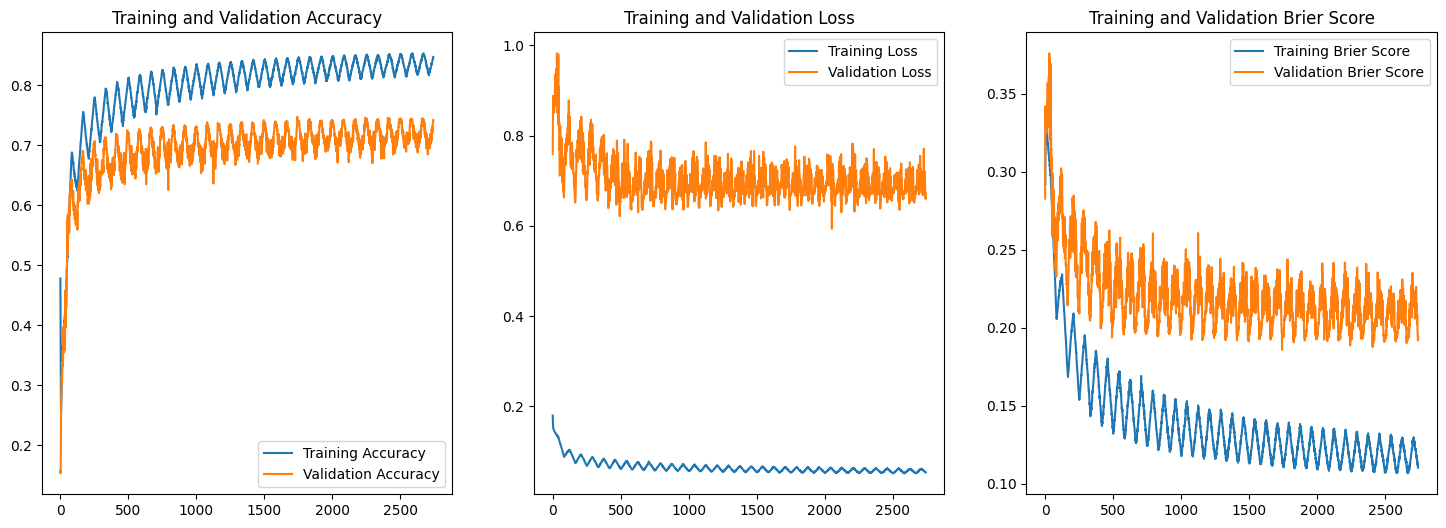

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

brier_score = history.history['brier_score']
val_brier_score = history.history['val_brier_score']


epochs_range = range(2743)
# Crear figura y ejes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficar Accuracy
axes[0].plot(epochs_range, acc, label='Training Accuracy')
axes[0].plot(epochs_range, val_acc, label='Validation Accuracy')
axes[0].legend(loc='lower right')
axes[0].set_title('Training and Validation Accuracy')

# Graficar Loss
axes[1].plot(epochs_range, loss, label='Training Loss')
axes[1].plot(epochs_range, val_loss, label='Validation Loss')
axes[1].legend(loc='upper right')
axes[1].set_title('Training and Validation Loss')

# Graficar Brier Score
axes[2].plot(epochs_range, brier_score, label='Training Brier Score')
axes[2].plot(epochs_range, val_brier_score, label='Validation Brier Score')
axes[2].legend(loc='upper right')
axes[2].set_title('Training and Validation Brier Score')

plt.show()

In [91]:
test_loss, test_accuracy, test_brier_score = model.evaluate(
    X_test, y_test)

4234/4234 [==============================] - 3s 715us/step - loss: 0.6340 - brier_score: 0.1865 - accuracy: 0.7455


In [92]:
model.predict(X_test)

4234/4234 [==============================] - 3s 633us/step


array([[0.96262926],
       [0.27014378],
       [0.26767164],
       ...,
       [0.99991405],
       [0.905357  ],
       [0.16003017]], dtype=float32)

In [51]:
X_test[1]

array([ 1.39749661,  0.28597382, -0.55628111,  1.58972772,  5.18458914,
       -0.11406946,  0.4341341 ,  0.72537923, -0.06032554, -0.47569163,
       -0.37857859,  0.27615877, -0.30224348, -0.06517068, -0.13887806,
       -1.00115472,  0.57727724,  0.93139467,  1.20080723,  1.27880368,
       -0.90815693, -0.20670061, -0.31098692, -0.36144963, -0.52903524,
       -0.28378785, -0.3465166 , -0.04681387, -0.33662367, -0.17584319,
       -0.28923412, -0.22022077, -0.59427028, -0.42281632,  0.23654629,
       -0.21306725, -0.87061195,  1.58292372,  0.58839875, -0.60858016,
       -0.01898725,  0.05158652, -0.08456537, -1.55444565, -0.66067558,
       -0.99866119,  1.4167914 ,  0.11924717,  1.23983838, -0.15249195,
       -0.059876  ,  1.34088244,  2.01147186, -0.14493599, -0.39388176,
       -0.25221884,  1.52130001, -0.35882445, -0.04486102, -0.76743516,
       -0.20027828,  0.29289476, -0.65466805, -0.09886963,  0.2856049 ,
        0.86104662,  0.04079795, -0.37872055, -0.29010043,  0.65

In [60]:
indices_of_zero = y_test[y_test == 0.0].index
print(np.sum(y_test == 0)/np.sum(y_test ==1))
print(np.sum(y_test == 0))

0.17472924813790353
20151


In [112]:
y_pred_prob = model.predict(X_test)
def adjust_probabilities(y_pred_prob):
    y_pred_adjusted = np.zeros_like(y_pred_prob)
    mask = y_pred_prob > 0.2
    
    y_pred_adjusted[mask] = 0.5 + 0.5 * ((y_pred_prob[mask] - 0.2) / 0.8)
    y_pred_adjusted[~mask] = 0.5 * (y_pred_prob[~mask] / 0.8)
    
    return y_pred_adjusted

y_pred_adjusted = adjust_probabilities(y_pred_prob)

# Calcular la matriz de confusión
y_pred = (y_pred_adjusted > 0.5).astype("int32")

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
accu = accuracy_score(y_test, y_pred)
print(accu)

4234/4234 [==============================] - 2s 574us/step
[[  8623  11528]
 [ 14892 100435]]
0.8049867875226974


In [101]:
from sklearn.metrics import confusion_matrix

# Supongamos que tenemos las siguientes predicciones y etiquetas verdaderas para el conjunto de test
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.02).astype("int32")

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
accu = accuracy_score(y_test, y_pred)
print(accu)


4234/4234 [==============================] - 2s 585us/step
[[   508  19643]
 [   397 114930]]
0.8520793043889044


In [75]:
from sklearn.metrics import accuracy_score

# Lista para almacenar los resultados de precisión para cada umbral
accuracy_list = []

# Posibles valores de umbral que deseas probar
threshold_values = np.linspace(0, .5, 51)

# Bucle para iterar a través de cada valor de umbral
for thresh in threshold_values:
    y_pred = (y_pred_prob > thresh).astype("int32")
    
    # Calcular y almacenar la precisión para este umbral
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)

# Encontrar el umbral que proporciona la mejor precisión
best_threshold = threshold_values[np.argmax(accuracy_list)]
best_accuracy = np.max(accuracy_list)

print(f"Mejor umbral: {best_threshold}, Mejor precisión: {best_accuracy}")


Mejor umbral: 0.02, Mejor precisión: 0.8520793043889044


In [95]:
# Aplanar y_pred_prob_np para que tenga la misma forma que y_test_np
y_pred_prob_np = y_pred_prob_np.flatten()

# Verificar las dimensiones nuevamente
print("Dimensiones de y_test_np:", y_test_np.shape)
print("Dimensiones de y_pred_prob_np:", y_pred_prob_np.shape)

def brier_score(y_true, y_pred):
    N = len(y_true)
    return np.sum((y_true - y_pred) ** 2) / N

# Lista para almacenar los resultados del Brier Score para cada umbral
brier_list = []

# Posibles valores de umbral
threshold_values = np.linspace(0, 1, 50)

# Bucle para iterar a través de cada valor de umbral
for thresh in threshold_values:
    y_pred = (y_pred_prob_np > thresh).astype("float32")
    
    # Calcular y almacenar el Brier Score para este umbral
    brier = brier_score(y_test_np, y_pred)
    brier_list.append(brier)

# Encontrar el umbral que proporciona el Brier Score más bajo
best_threshold = threshold_values[np.argmin(brier_list)]
best_brier = np.min(brier_list)

print(f"Mejor umbral: {best_threshold}, Mejor Brier Score: {best_brier}")


Dimensiones de y_test_np: (135478,)
Dimensiones de y_pred_prob_np: (135478,)
Mejor umbral: 0.02040816326530612, Mejor Brier Score: 0.1480166521501646


In [96]:
from sklearn.metrics import f1_score

# Lista para almacenar los resultados del F1 Score para cada umbral
f1_list = []

# Posibles valores de umbral que deseas probar
threshold_values = np.linspace(0, 0.5, 51)

# Bucle para iterar a través de cada valor de umbral
for thresh in threshold_values:
    y_pred = (y_pred_prob > thresh).astype("int32")
    
    # Calcular y almacenar el F1 Score para este umbral
    f1 = f1_score(y_test, y_pred)
    f1_list.append(f1)

# Encontrar el umbral que proporciona el mejor F1 Score
best_threshold = threshold_values[np.argmax(f1_list)]
best_f1 = np.max(f1_list)

print(f"Mejor umbral: {best_threshold}, Mejor F1 Score: {best_f1}")

Mejor umbral: 0.01, Mejor F1 Score: 0.9198207509148009


# Guardamos datos accuracy y loss

In [48]:
df = pd.DataFrame.from_dict(history.history)
df.to_csv('../../Modelos enternados/history_final.csv', index=False)

# Guardamos el modelo

In [49]:
path_to_save = '../../Modelos enternados/'

In [50]:
model.save(path_to_save + 'Modelo_final2.h5')